In [1]:
from statisticslib.models.CoxIngersollRoss import CoxIngersollRoss

%matplotlib inline
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

c:\Users\lyapp\Desktop\VEGA\Courses\Prog_ing_2024\ExposureSandbox-master\statisticslib\models\CoxIngersollRoss.py:8: SyntaxWarning: invalid escape sequence '\d'
  """


In [2]:
def density_sample_series(data: pd.Series, bins: int = 1) -> pd.Series:
        leftEnd = int(data.min()) - 1
        rightEnd = int(data.max()) + 1

        binsRanges: np.ndarray = np.linspace(leftEnd, rightEnd, bins)

        countValuesAtSample: pd.Series = data.value_counts(
            bins=binsRanges,
            sort=False,
            normalize=True,
            dropna=True
        )
        trimZerosFromSample: np.ndarray = np.trim_zeros(
            countValuesAtSample.values
        )

        temp = countValuesAtSample.values != 0.0
        startIndex = temp.argmax()
        endIndex = temp.shape[0] - temp[::-1].argmax() - 1

        flagStart = 0
        flagEnd = 0

        if startIndex > 0:
            trimZerosFromSample = np.insert(trimZerosFromSample, 0, 0.0)
            flagStart = 1
        if endIndex < bins - 1:
            trimZerosFromSample = np.append(trimZerosFromSample, 0.0)
            flagEnd = 1

        return pd.Series(
            trimZerosFromSample,
            index=binsRanges[startIndex-flagStart:endIndex+flagEnd+1]
        )

<Axes: >

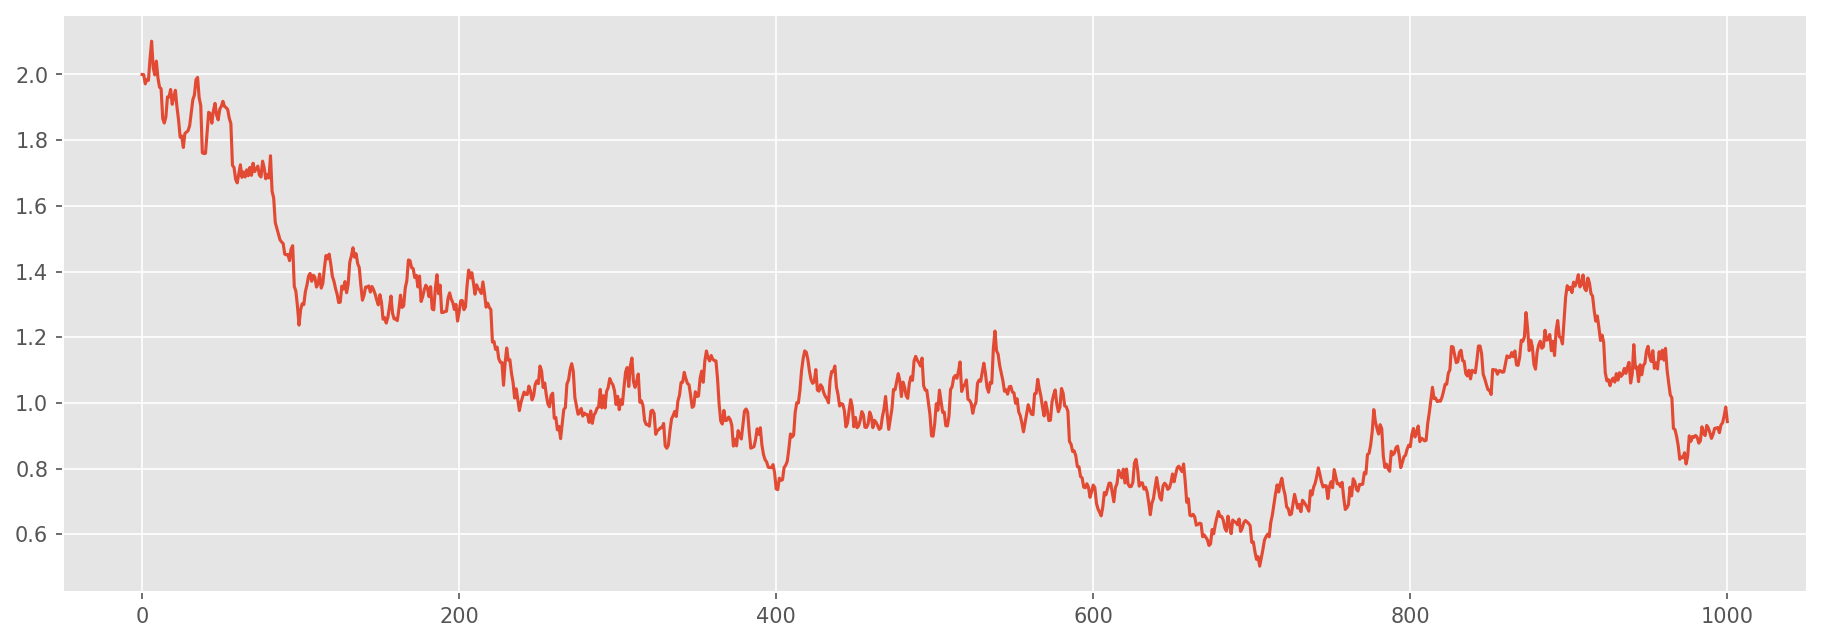

In [3]:
_, ax = plt.subplots(figsize=(15, 5), dpi=150)

N = 1000
h = 1

kappa = 4
theta = 1
sigma = 0.5

startpoint = 2

X_1 = CoxIngersollRoss(sigma, kappa, theta, N, startpoint).simulateTrajectory(h)
X_1.plot(ax=ax)

## Изменим волатильность

In [4]:
N_path = 1000
N_obs = 10
h = 1
d = 1

sigma_one = 0.5
sigma_two = 0.6


meanRevert = 4
drift = 1
startpoint = 0.1

model_base = CoxIngersollRoss(sigma_one, meanRevert, drift, N_obs, startpoint)
model_alternative = CoxIngersollRoss(
    sigma_two,
    meanRevert,
    drift,
    N_obs,
    startpoint
)

result_base = pd.DataFrame()
result_alt = pd.DataFrame()

for i in tqdm(range(N_path), desc="Processing", leave=True):
    result_base[str(i)] = model_base.simulateTrajectory(h)
    result_alt[str(i)] = model_alternative.simulateTrajectory(h)

Processing:   0%|          | 0/1000 [00:00<?, ?it/s]

Посмотрим за отдельное время, корректно ли переводит в равномерное.

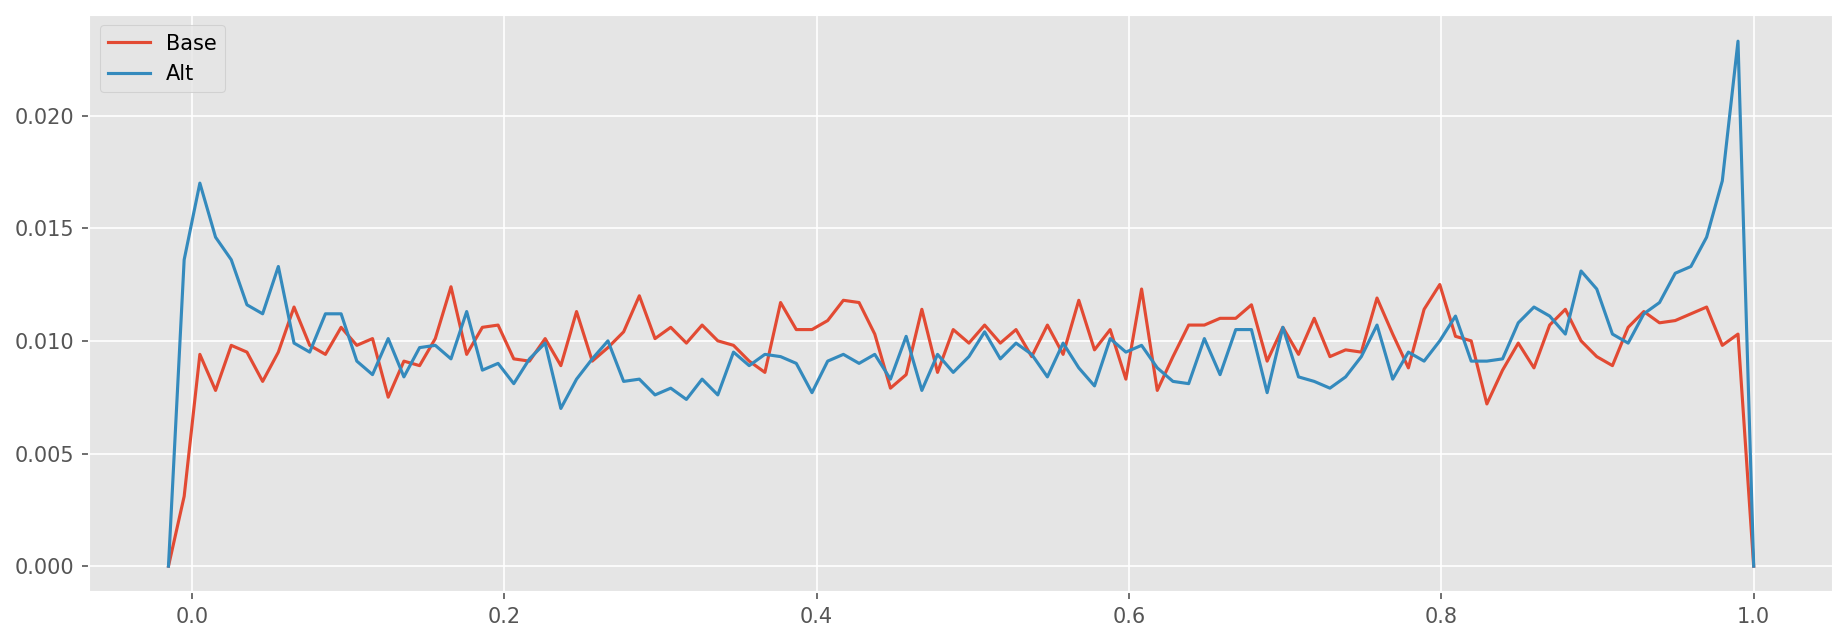

In [5]:
_, ax = plt.subplots(figsize=(15, 5), dpi=150)

sigma_one = 0.5

meanRevert = 4
drift = 1
startpoint = 0.1

customUniformBase = result_base.copy()
customUniformAlt = result_alt.copy()


for index, row in result_base.iterrows():
    if index == 0:
        continue
    T = index*1.0/250.0
    c = 2*meanRevert / (sigma_one**2*(1 - np.exp(-meanRevert*T)))

    customUniformBase.iloc[index] = pd.Series(scipy.stats.ncx2.cdf(
        2*c*row.to_numpy(),
        4*meanRevert*drift / sigma_one**2,
        2*startpoint*c*np.exp(-meanRevert*T)
    ))

for index, row in result_alt.iterrows():
    if index == 0:
        continue
    T = index*1.0/250.0
    c = 2*meanRevert / (sigma_one**2*(1 - np.exp(-meanRevert*T)))

    customUniformAlt.iloc[index] = pd.Series(scipy.stats.ncx2.cdf(
        2*c*row.to_numpy(),
        4*meanRevert*drift / sigma_one**2,
        2*startpoint*c*np.exp(-meanRevert*T)
    ))

customUniformBase = customUniformBase.drop(customUniformBase.index[0])
customUniformAlt = customUniformAlt.drop(customUniformAlt.index[0])

density_sample_series(pd.Series(customUniformBase.values.flatten()), 200).plot(
    ax=ax, label="Base")
density_sample_series(pd.Series(customUniformAlt.values.flatten()), 200).plot(
    ax=ax, label="Alt")
plt.legend()
plt.show()

## Изменим $\kappa$

In [6]:
N_path = 5000
N_obs = 10
h = 1
d = 1

sigma = 0.5

meanRevert_base = 4
meanRevert_alt = 4.1
drift = 1
startpoint = 0.1

model_base = CoxIngersollRoss(sigma, meanRevert_base, drift, N_obs, startpoint)
model_alternative = CoxIngersollRoss(
    sigma,
    meanRevert_alt,
    drift,
    N_obs,
    startpoint
)

result_base = pd.DataFrame()
result_alt = pd.DataFrame()

for i in tqdm(range(N_path), desc="Processing", leave=True):
    result_base[str(i)] = model_base.simulateTrajectory(h)
    result_alt[str(i)] = model_alternative.simulateTrajectory(h)

Processing:   0%|          | 0/5000 [00:00<?, ?it/s]

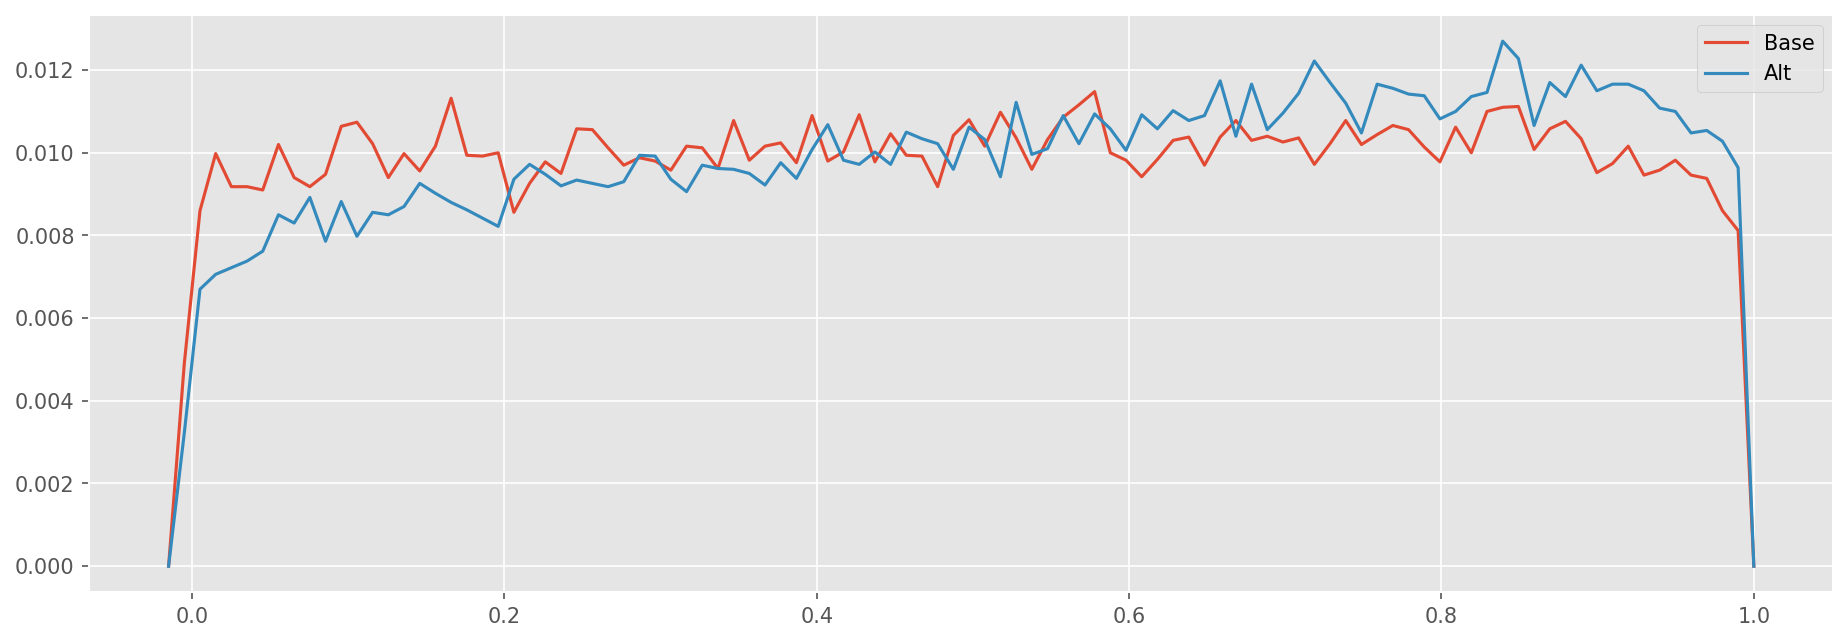

In [7]:
_, ax = plt.subplots(figsize=(15, 5), dpi=150)

sigma_one = 0.5

meanRevert = 4
drift = 1
startpoint = 0.1

customUniformBase = result_base.copy()
customUniformAlt = result_alt.copy()


for index, row in result_base.iterrows():
    if index == 0:
        continue
    T = index*1.0/250.0
    c = 2*meanRevert / (sigma_one**2*(1 - np.exp(-meanRevert*T)))

    customUniformBase.iloc[index] = pd.Series(scipy.stats.ncx2.cdf(
        2*c*row.to_numpy(),
        4*meanRevert*drift / sigma_one**2,
        2*startpoint*c*np.exp(-meanRevert*T)
    ))

for index, row in result_alt.iterrows():
    if index == 0:
        continue
    T = index*1.0/250.0
    c = 2*meanRevert / (sigma_one**2*(1 - np.exp(-meanRevert*T)))

    customUniformAlt.iloc[index] = pd.Series(scipy.stats.ncx2.cdf(
        2*c*row.to_numpy(),
        4*meanRevert*drift / sigma_one**2,
        2*startpoint*c*np.exp(-meanRevert*T)
    ))

customUniformBase = customUniformBase.drop(customUniformBase.index[0])
customUniformAlt = customUniformAlt.drop(customUniformAlt.index[0])

density_sample_series(pd.Series(customUniformBase.values.flatten()), 200).plot(
    ax=ax, label="Base")
density_sample_series(pd.Series(customUniformAlt.values.flatten()), 200).plot(
    ax=ax, label="Alt")
plt.legend()
plt.show()

## Изменим $\theta$

In [8]:
N_path = 5000
N_obs = 10
h = 1
d = 1

sigma = 0.5

meanRevert = 4
drift_base = 1
drift_alt = 1.1

startpoint = 0.1

model_base = CoxIngersollRoss(sigma, meanRevert, drift_base, N_obs, startpoint)
model_alternative = CoxIngersollRoss(
    sigma,
    meanRevert,
    drift_alt,
    N_obs,
    startpoint
)

result_base = pd.DataFrame()
result_alt = pd.DataFrame()

for i in tqdm(range(N_path), desc="Processing", leave=True):
    result_base[str(i)] = model_base.simulateTrajectory(h)
    result_alt[str(i)] = model_alternative.simulateTrajectory(h)

Processing:   0%|          | 0/5000 [00:00<?, ?it/s]

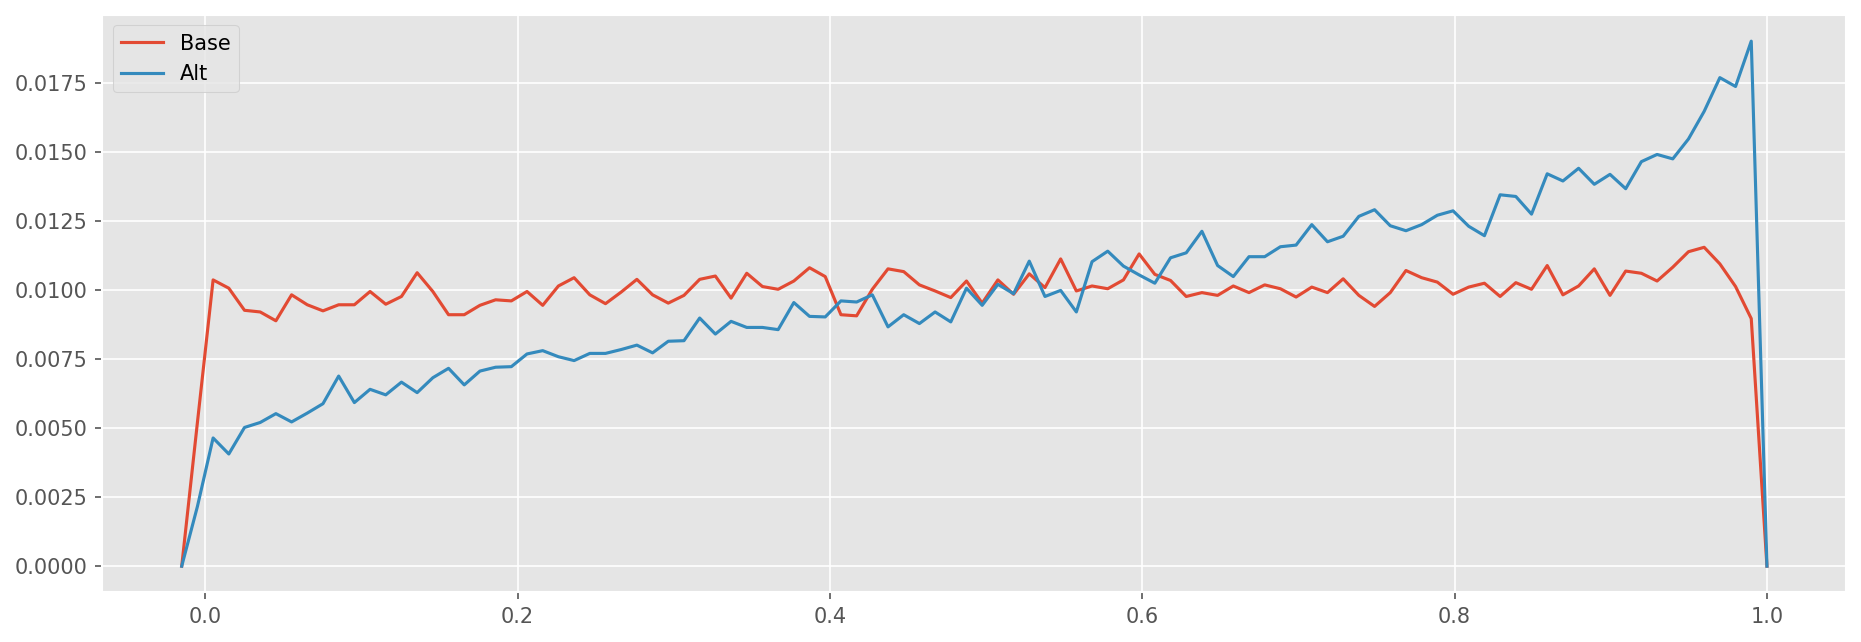

In [9]:
_, ax = plt.subplots(figsize=(15, 5), dpi=150)

sigma_one = 0.5

meanRevert = 4
drift = 1
startpoint = 0.1

customUniformBase = result_base.copy()
customUniformAlt = result_alt.copy()


for index, row in result_base.iterrows():
    if index == 0:
        continue
    T = index*1.0/250.0
    c = 2*meanRevert / (sigma_one**2*(1 - np.exp(-meanRevert*T)))

    customUniformBase.iloc[index] = pd.Series(scipy.stats.ncx2.cdf(
        2*c*row.to_numpy(),
        4*meanRevert*drift / sigma_one**2,
        2*startpoint*c*np.exp(-meanRevert*T)
    ))

for index, row in result_alt.iterrows():
    if index == 0:
        continue
    T = index*1.0/250.0
    c = 2*meanRevert / (sigma_one**2*(1 - np.exp(-meanRevert*T)))

    customUniformAlt.iloc[index] = pd.Series(scipy.stats.ncx2.cdf(
        2*c*row.to_numpy(),
        4*meanRevert*drift / sigma_one**2,
        2*startpoint*c*np.exp(-meanRevert*T)
    ))

customUniformBase = customUniformBase.drop(customUniformBase.index[0])
customUniformAlt = customUniformAlt.drop(customUniformAlt.index[0])

density_sample_series(pd.Series(customUniformBase.values.flatten()), 200).plot(
    ax=ax, label="Base")
density_sample_series(pd.Series(customUniformAlt.values.flatten()), 200).plot(
    ax=ax, label="Alt")
plt.legend()
plt.show()

## Пробуем запустить статистики.

### Колмогоров Смирнов(другая вола)

In [10]:
def KolmogorovSmirnovStatisticsCustom(observationsUniform: pd.Series) -> float:
    sizeSeries: int = observationsUniform.shape[0]

    uSeriesSorted: np.ndarray = np.sort(observationsUniform)
    sequenceIntNum: np.ndarray = np.arange(1, sizeSeries + 1)


    d_plus: float = np.max((sequenceIntNum / sizeSeries) - uSeriesSorted)
    d_minus: float = np.max(
        uSeriesSorted - ((sequenceIntNum - 1) / sizeSeries)
    )

    return np.max([d_plus, d_minus])

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

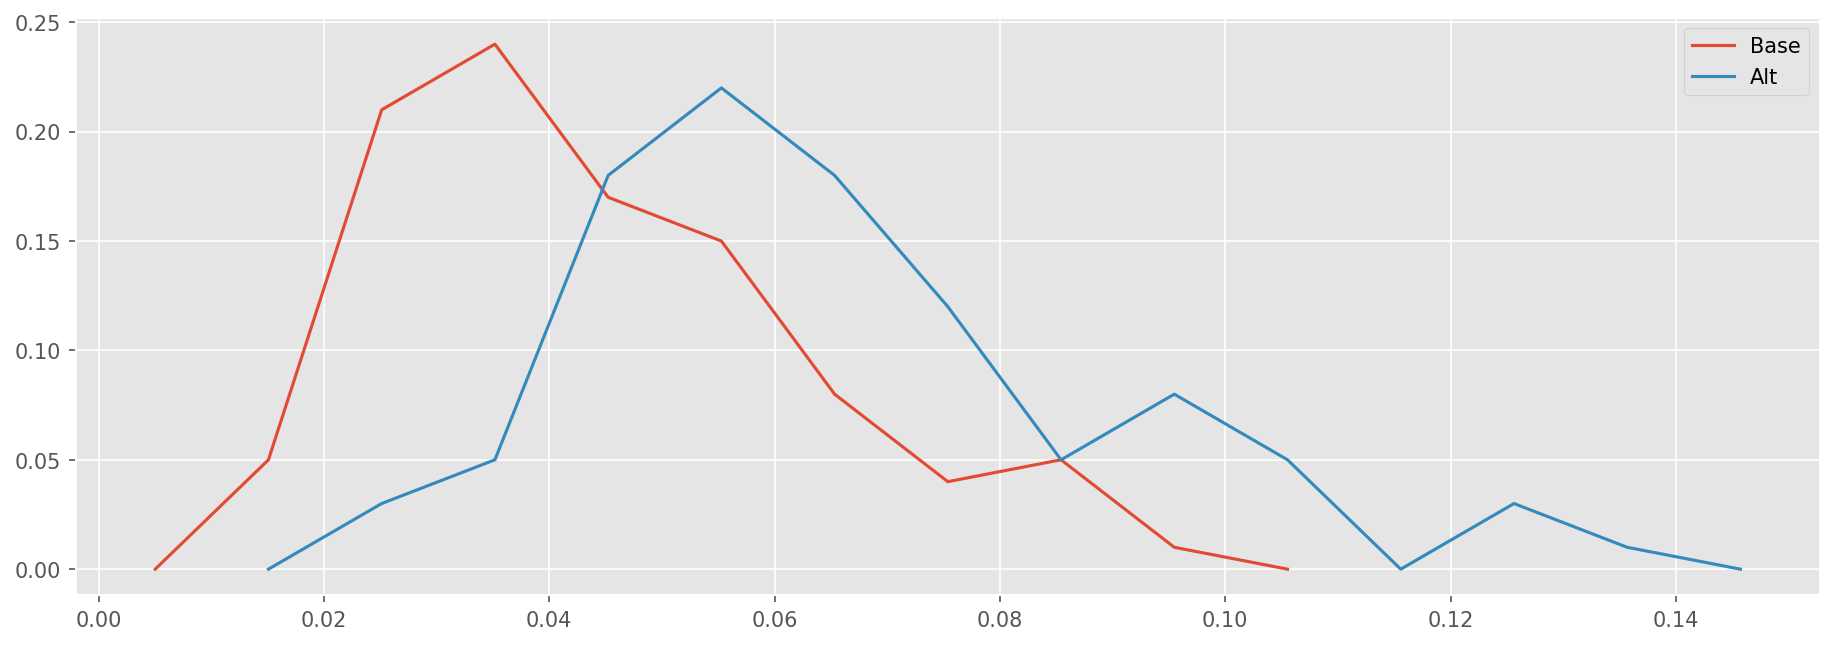

In [11]:
_, ax = plt.subplots(figsize=(15, 5), dpi=150)

N_times_for_statistics = 100
N_path = 100
N_obs = 10
timeStep = 1
backtestHorizon = 1

sigma = 0.5
sigma_alt = 0.6
meanRevert = 4
drift = 1
startpoint = 0.1

model = CoxIngersollRoss(sigma, meanRevert, drift, N_obs, startpoint)
model_alt = CoxIngersollRoss(sigma_alt, meanRevert, drift, N_obs, startpoint)

ks_value = np.zeros(N_times_for_statistics)
ks_value_alt = np.zeros(N_times_for_statistics)


for index in tqdm(range(N_times_for_statistics), desc="Processing", leave=True):
    result = pd.DataFrame()
    result_alt = pd.DataFrame()

    for i in range(N_path):
        result[str(i)] = model.transformToUniform(
            model.simulateTrajectory(backtestHorizon), backtestHorizon)
        result_alt[str(i)] = model.transformToUniform(
            model_alt.simulateTrajectory(backtestHorizon), backtestHorizon)

    customUniform = pd.Series(
        result.drop(result.index[0]).values.flatten())
    customUniformAlt = pd.Series(
        result_alt.drop(result_alt.index[0]).values.flatten())

    ks_value[index] = KolmogorovSmirnovStatisticsCustom(customUniform)
    ks_value_alt[index] = KolmogorovSmirnovStatisticsCustom(customUniformAlt)


density_sample_series(pd.Series(ks_value), 200).plot(
    ax=ax, label="Base")
density_sample_series(pd.Series(ks_value_alt), 200).plot(
    ax=ax, label="Alt")

plt.legend()
plt.show()

### Андерсон Дарлинг(другая вола)

In [12]:
def AndersonDarlingStatisticsCustom(observationsUniform: pd.Series) -> float:
    sizeSeries: int = observationsUniform.shape[0]

    # обычный AD
    uSeriesSorted: np.ndarray = np.sort(observationsUniform)
    sequenceIntNum: np.ndarray = np.arange(1, sizeSeries + 1)

    temp: np.ndarray = uSeriesSorted.copy()
    temp[temp == 0.0] = 1e-15
    log_u_values: np.ndarray = np.log(temp)

    uSeriesSorted[uSeriesSorted == 1.0] = 1 - 1e-15
    log_1_minus_u_values: np.ndarray = np.log(1 - uSeriesSorted)

    massive_one = 2*sequenceIntNum - 1
    massive_two = 2*(sizeSeries - sequenceIntNum) + 1

    result_one: np.ndarray = log_u_values * massive_one
    result_two: np.ndarray = log_1_minus_u_values * massive_two

    return -sizeSeries - (result_one + result_two).mean()

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

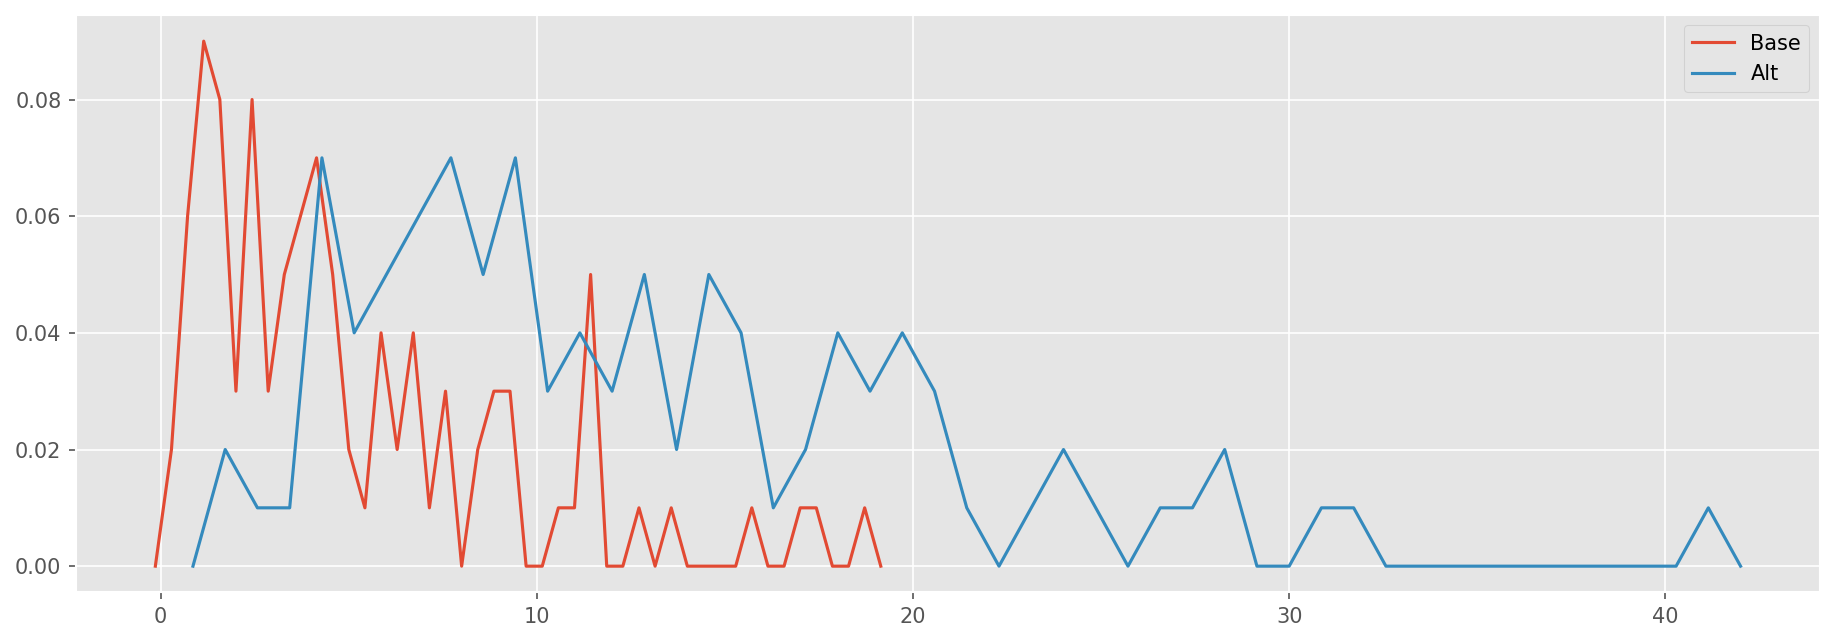

In [13]:
_, ax = plt.subplots(figsize=(15, 5), dpi=150)

N_times_for_statistics = 100
N_path = 100
N_obs = 10
timeStep = 1
backtestHorizon = 1

sigma = 0.5
sigma_alt = 0.6
meanRevert = 4
drift = 1
startpoint = 0.1

model = CoxIngersollRoss(sigma, meanRevert, drift, N_obs, startpoint)
model_alt = CoxIngersollRoss(sigma_alt, meanRevert, drift, N_obs, startpoint)

ad_value = np.zeros(N_times_for_statistics)
ad_value_alt = np.zeros(N_times_for_statistics)


for index in tqdm(range(N_times_for_statistics), desc="Processing", leave=True):
    result = pd.DataFrame()
    result_alt = pd.DataFrame()

    for i in range(N_path):
        result[str(i)] = model.transformToUniform(
            model.simulateTrajectory(backtestHorizon), backtestHorizon)
        result_alt[str(i)] = model.transformToUniform(
            model_alt.simulateTrajectory(backtestHorizon), backtestHorizon)

    customUniform = pd.Series(
        result.drop(result.index[0]).values.flatten())
    customUniformAlt = pd.Series(
        result_alt.drop(result_alt.index[0]).values.flatten())

    ad_value[index] = AndersonDarlingStatisticsCustom(customUniform)
    ad_value_alt[index] = AndersonDarlingStatisticsCustom(customUniformAlt)


density_sample_series(pd.Series(ad_value), 50).plot(
    ax=ax, label="Base")
density_sample_series(pd.Series(ad_value_alt), 50).plot(
    ax=ax, label="Alt")

plt.legend()
plt.show()

### Колмогоров Смирнов(другая $\kappa$)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

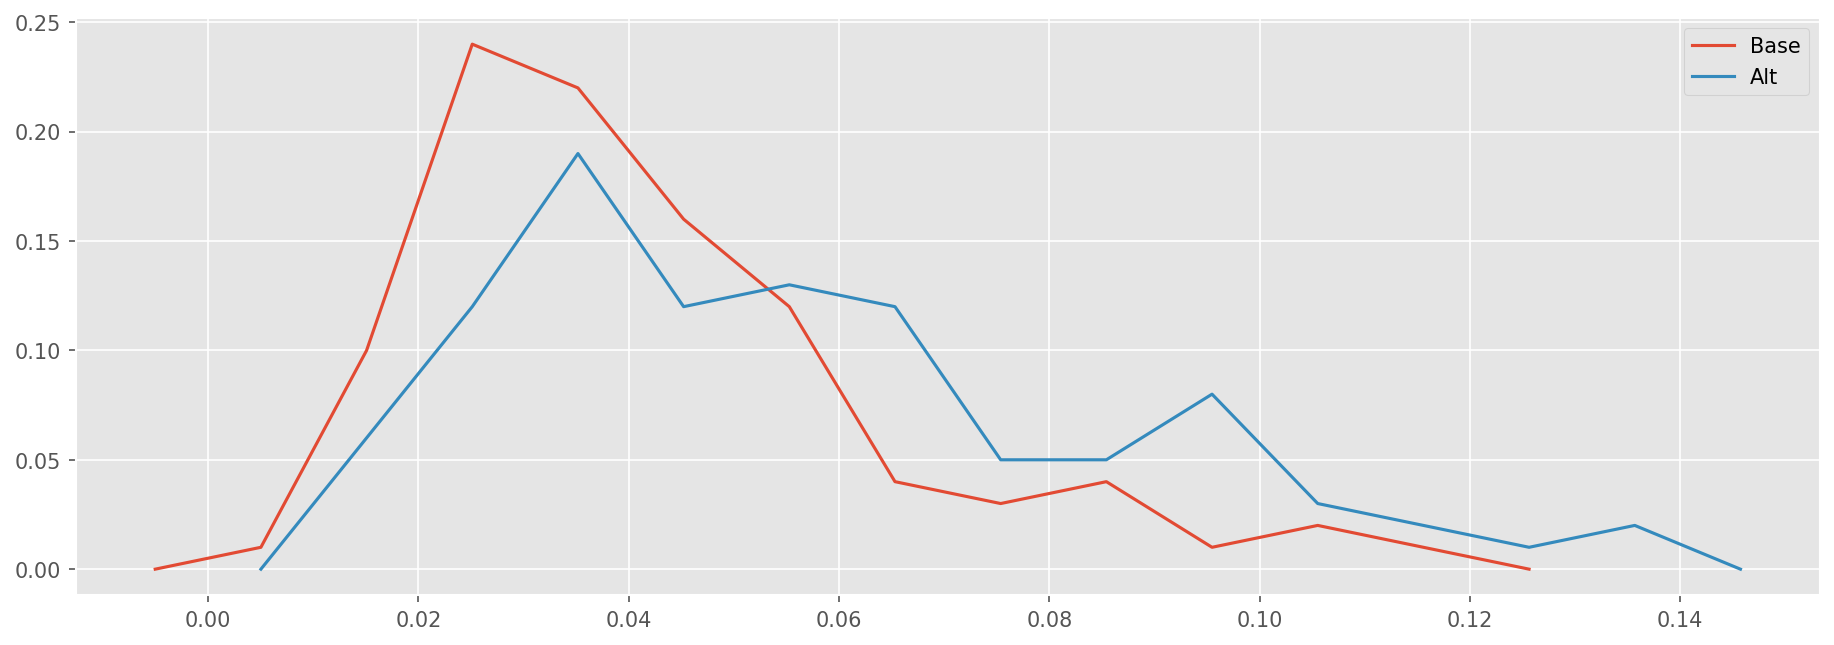

In [14]:
_, ax = plt.subplots(figsize=(15, 5), dpi=150)

N_times_for_statistics = 100
N_path = 100
N_obs = 10
timeStep = 1
backtestHorizon = 1

sigma = 0.5
meanRevert = 4
meanRevert_alt = 4.1
drift = 1
startpoint = 0.1

model = CoxIngersollRoss(sigma, meanRevert, drift, N_obs, startpoint)
model_alt = CoxIngersollRoss(sigma, meanRevert_alt, drift, N_obs, startpoint)

ks_value = np.zeros(N_times_for_statistics)
ks_value_alt = np.zeros(N_times_for_statistics)


for index in tqdm(range(N_times_for_statistics), desc="Processing", leave=True):
    result = pd.DataFrame()
    result_alt = pd.DataFrame()

    for i in range(N_path):
        result[str(i)] = model.transformToUniform(
            model.simulateTrajectory(backtestHorizon), backtestHorizon)
        result_alt[str(i)] = model.transformToUniform(
            model_alt.simulateTrajectory(backtestHorizon), backtestHorizon)

    customUniform = pd.Series(
        result.drop(result.index[0]).values.flatten())
    customUniformAlt = pd.Series(
        result_alt.drop(result_alt.index[0]).values.flatten())

    ks_value[index] = KolmogorovSmirnovStatisticsCustom(customUniform)
    ks_value_alt[index] = KolmogorovSmirnovStatisticsCustom(customUniformAlt)


density_sample_series(pd.Series(ks_value), 200).plot(
    ax=ax, label="Base")
density_sample_series(pd.Series(ks_value_alt), 200).plot(
    ax=ax, label="Alt")

plt.legend()
plt.show()

### Андерсон Дарлинг(другая $\kappa$)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

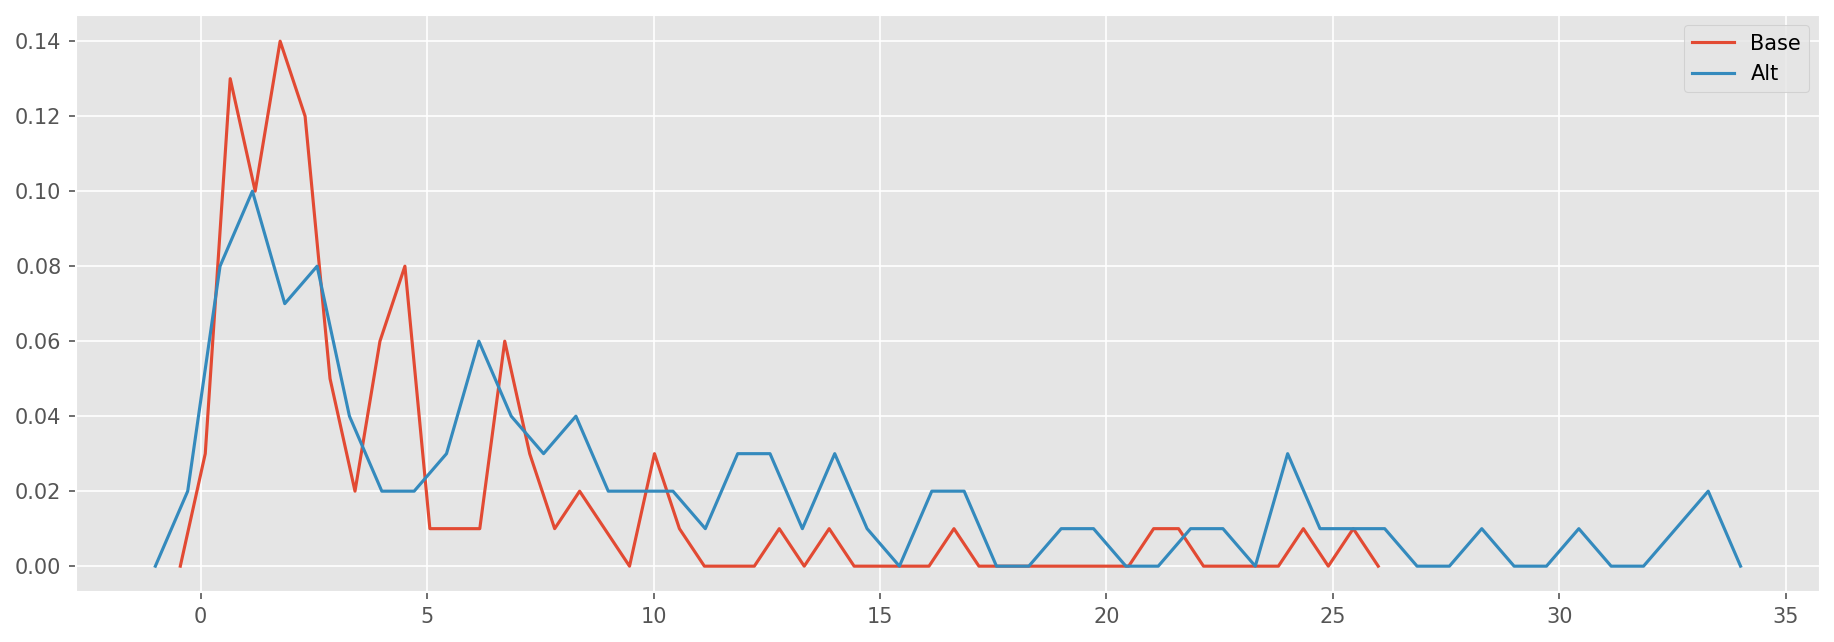

In [15]:
_, ax = plt.subplots(figsize=(15, 5), dpi=150)

N_times_for_statistics = 100
N_path = 100
N_obs = 10
timeStep = 1
backtestHorizon = 1

sigma = 0.5
meanRevert = 4
meanRevert_alt = 4.1
drift = 1
startpoint = 0.1

model = CoxIngersollRoss(sigma, meanRevert, drift, N_obs, startpoint)
model_alt = CoxIngersollRoss(sigma, meanRevert_alt, drift, N_obs, startpoint)

ad_value = np.zeros(N_times_for_statistics)
ad_value_alt = np.zeros(N_times_for_statistics)


for index in tqdm(range(N_times_for_statistics), desc="Processing", leave=True):
    result = pd.DataFrame()
    result_alt = pd.DataFrame()

    for i in range(N_path):
        result[str(i)] = model.transformToUniform(
            model.simulateTrajectory(backtestHorizon), backtestHorizon)
        result_alt[str(i)] = model.transformToUniform(
            model_alt.simulateTrajectory(backtestHorizon), backtestHorizon)

    customUniform = pd.Series(
        result.drop(result.index[0]).values.flatten())
    customUniformAlt = pd.Series(
        result_alt.drop(result_alt.index[0]).values.flatten())

    ad_value[index] = AndersonDarlingStatisticsCustom(customUniform)
    ad_value_alt[index] = AndersonDarlingStatisticsCustom(customUniformAlt)


density_sample_series(pd.Series(ad_value), 50).plot(
    ax=ax, label="Base")
density_sample_series(pd.Series(ad_value_alt), 50).plot(
    ax=ax, label="Alt")

plt.legend()
plt.show()

### Колмогоров Смирнов(другая $\theta$)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

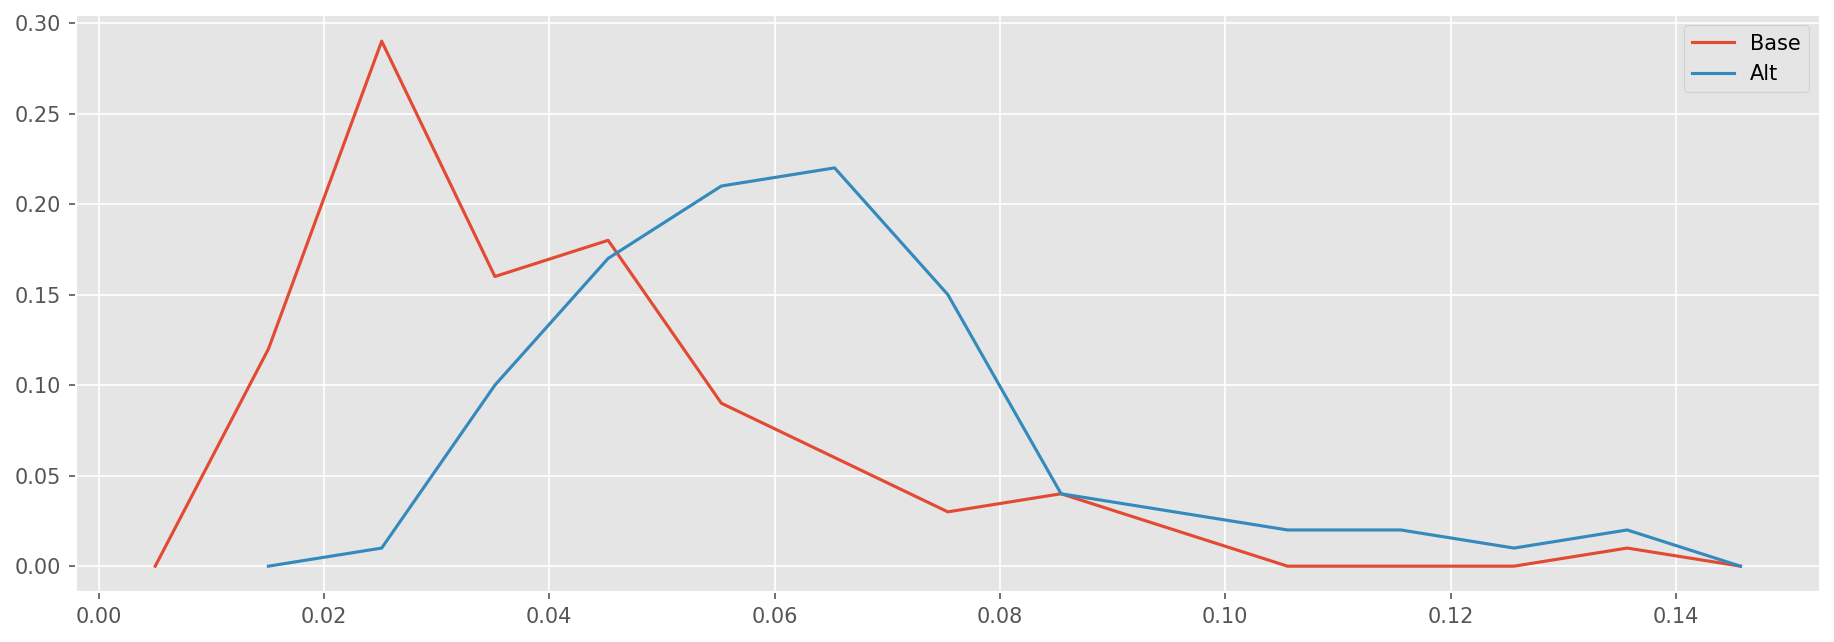

In [16]:
_, ax = plt.subplots(figsize=(15, 5), dpi=150)

N_times_for_statistics = 100
N_path = 100
N_obs = 10
timeStep = 1
backtestHorizon = 1

sigma = 0.5
meanRevert = 4
drift = 1
drift_alt = 1.1
startpoint = 0.1

model = CoxIngersollRoss(sigma, meanRevert, drift, N_obs, startpoint)
model_alt = CoxIngersollRoss(sigma_alt, meanRevert, drift, N_obs, startpoint)

ks_value = np.zeros(N_times_for_statistics)
ks_value_alt = np.zeros(N_times_for_statistics)


for index in tqdm(range(N_times_for_statistics), desc="Processing", leave=True):
    result = pd.DataFrame()
    result_alt = pd.DataFrame()

    for i in range(N_path):
        result[str(i)] = model.transformToUniform(
            model.simulateTrajectory(backtestHorizon), backtestHorizon)
        result_alt[str(i)] = model.transformToUniform(
            model_alt.simulateTrajectory(backtestHorizon), backtestHorizon)

    customUniform = pd.Series(
        result.drop(result.index[0]).values.flatten())
    customUniformAlt = pd.Series(
        result_alt.drop(result_alt.index[0]).values.flatten())

    ks_value[index] = KolmogorovSmirnovStatisticsCustom(customUniform)
    ks_value_alt[index] = KolmogorovSmirnovStatisticsCustom(customUniformAlt)


density_sample_series(pd.Series(ks_value), 200).plot(
    ax=ax, label="Base")
density_sample_series(pd.Series(ks_value_alt), 200).plot(
    ax=ax, label="Alt")

plt.legend()
plt.show()

### Андерсон Дарлинг(другая $\theta$)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

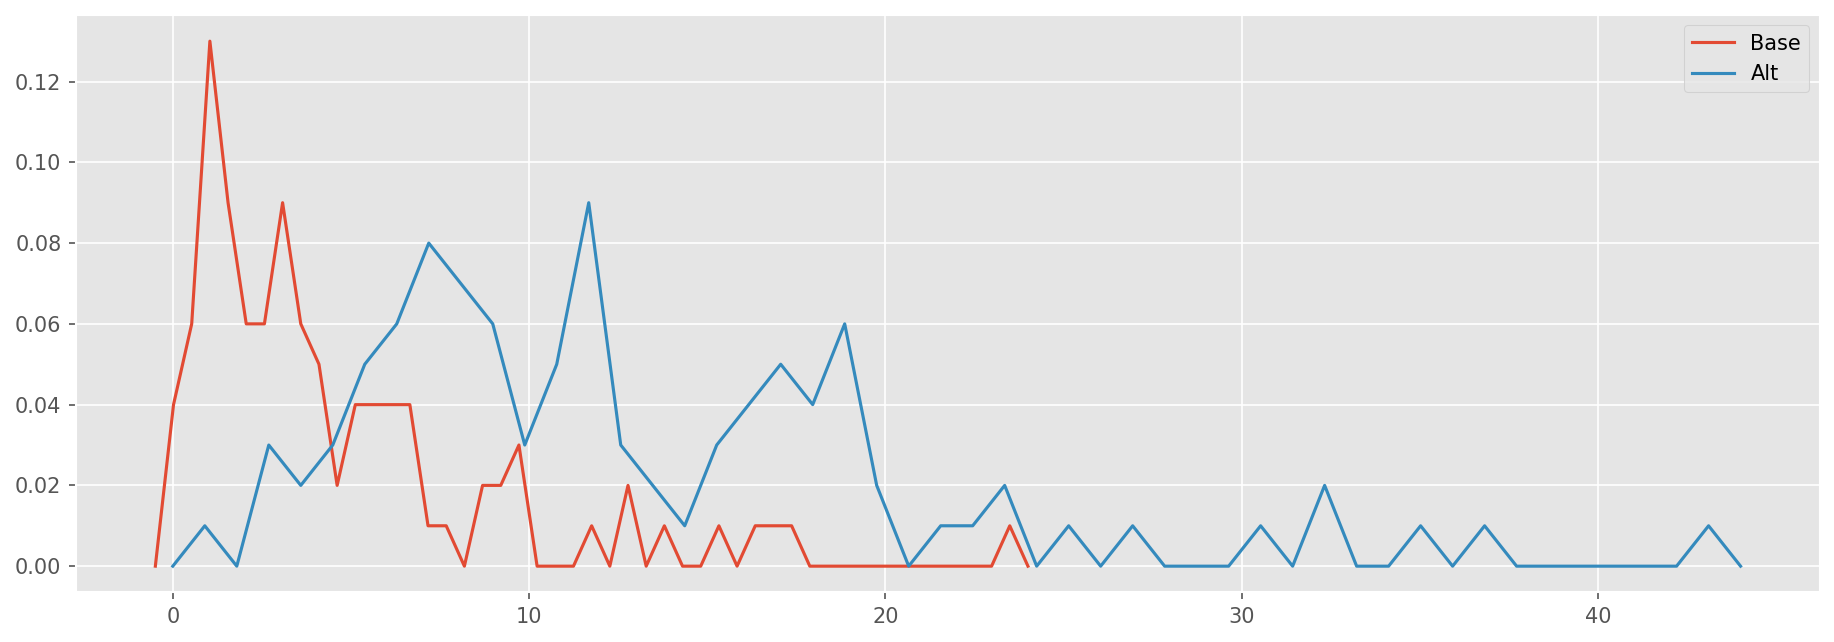

In [17]:
_, ax = plt.subplots(figsize=(15, 5), dpi=150)

N_times_for_statistics = 100
N_path = 100
N_obs = 10
timeStep = 1
backtestHorizon = 1

sigma = 0.5
meanRevert = 4
drift = 1
drift_alt = 1.1
startpoint = 0.1

model = CoxIngersollRoss(sigma, meanRevert, drift, N_obs, startpoint)
model_alt = CoxIngersollRoss(sigma_alt, meanRevert, drift, N_obs, startpoint)

ad_value = np.zeros(N_times_for_statistics)
ad_value_alt = np.zeros(N_times_for_statistics)


for index in tqdm(range(N_times_for_statistics), desc="Processing", leave=True):
    result = pd.DataFrame()
    result_alt = pd.DataFrame()

    for i in range(N_path):
        result[str(i)] = model.transformToUniform(
            model.simulateTrajectory(backtestHorizon), backtestHorizon)
        result_alt[str(i)] = model.transformToUniform(
            model_alt.simulateTrajectory(backtestHorizon), backtestHorizon)

    customUniform = pd.Series(
        result.drop(result.index[0]).values.flatten())
    customUniformAlt = pd.Series(
        result_alt.drop(result_alt.index[0]).values.flatten())

    ad_value[index] = AndersonDarlingStatisticsCustom(customUniform)
    ad_value_alt[index] = AndersonDarlingStatisticsCustom(customUniformAlt)


density_sample_series(pd.Series(ad_value), 50).plot(
    ax=ax, label="Base")
density_sample_series(pd.Series(ad_value_alt), 50).plot(
    ax=ax, label="Alt")

plt.legend()
plt.show()

Для Liklihood Ratio есть несколько вариантов решения. Нелинейными преобразованиями перевести вектор нецентральных $\chi^2$-распределенных случайных величин в гассовский вектор. И второй способ, численно посчитать функцию правдоподобия и применить метод, реализованный в `statisticslib`.